This script does all the logistic regression stuff using all of the data.
It:
- goes through all assumptions for logistic regression
- alters the data wherever necessary to make things work
- creates a classifier and evaluates its performance

### Data Loading

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import json

from python_proj.utils.util import safe_save_fig, subtract_dict, Counter
import python_proj.utils.exp_utils as exp_utils

file_name = "dataset_90_days_started_11_07_23_preprocessed"
base_path = exp_utils.BASE_PATH
data_path = f'{base_path}/final_data/{file_name}.csv'
figure_base_path = f"{base_path}/figures/modelling/{file_name}/"

# Meta stuff.
pr_merged_key = 'PullRequestIsMerged'
ftc_key = 'SubmitterIsFirstTimeContributor'
seed_counter = Counter()


# Loads regular dataframe.
df: pd.DataFrame = pd.read_csv(filepath_or_buffer=data_path, header=0)
# df = df.drop(['Unnamed: 1', "Project Name.1"], axis=1)
if True:
    df = df.sample(math.floor(len(df) * 0.1))
    print((5 * "#########\n") +
          "YOU'RE USING A RANDOM SUBSAMPLE OF 10%!!!\n" + (5 * "#########\n"))
print(df.columns)

# Loads first-time contributor data frame.
ftc_df = df[df[ftc_key]]
print(f'{len(df)=}')
print(f'{len(ftc_df)=}')

# Creates sub-datasets.
metadata_fields = ['ID', 'Project Name',
                   'Submitter ID', 'PR Number', 'Closed At']
dependent_fields = [pr_merged_key]
independent_fields = [field for field in df.columns
                      if (field not in metadata_fields
                          and field not in dependent_fields)]

# Removes fields with only columns from ftc dataset.
ftc_columns_old = ftc_df.columns
ftc_df = ftc_df.loc[:, (ftc_df != 0).any()]
ftc_columns_new = ftc_df.columns
ftc_removed = [field for field in ftc_columns_old
               if field not in ftc_columns_new]
print(f'{ftc_removed=}')

df[independent_fields].describe()


#########
#########
#########
#########
#########
YOU'RE USING A RANDOM SUBSAMPLE OF 10%!!!
#########
#########
#########
#########
#########

Index(['ID', 'Project Name', 'Submitter ID', 'PR Number', 'Closed At',
       'PullRequestIsMerged', 'SubmitterIsFirstTimeContributor',
       'ControlIntegratedBySameUser', 'ControlPullRequestLifeTimeInMinutes',
       'ControlPullRequestHasComments', 'ControlNumberOfCommitsInPullRequest',
       'ControlPullRequestHasCommentByExternalUser',
       'ControlHasHashTagInDescription',
       'FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRIntegratorToSubmitter-In)',
       'FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRCommenterToSubmitter-In)',
       'FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRCommenterToCommenter-In)',
       'FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.IssueCommenterToCommenter-In)',
       'FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.IssueCommenterToSubmitter-In)',
       'FirstO

,ControlPullRequestLifeTimeInMinutes,ControlNumberOfCommitsInPullRequest,FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRIntegratorToSubmitter-In),FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRCommenterToSubmitter-In),FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRCommenterToCommenter-In),FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.IssueCommenterToCommenter-In),FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.IssueCommenterToSubmitter-In),FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.PRIntegratorToSubmitter-In),FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.PRCommenterToSubmitter-In),FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.PRCommenterToCommenter-In),...,IntraProjectSubmitterIssueCommentCount,SharedExperienceIssueSubmittedBySubmitterCommentedOnByIntegrator,SharedExperienceIssueSubmittedByIntegratorCommentedOnBySubmitter,SharedExperienceIssueDiscussionParticipationByIntegratorAndSubmitter,EcosystemExperienceSubmitterIssueSubmissionCount,EcosystemExperienceSubmitterIssueCommentCount,DependencyEcosystemExperienceSubmitterIssueSubmissionCount,DependencyEcosystemExperienceSubmitterIssueCommentCount,InversedDependencyEcosystemExperienceSubmitterIssueSubmissionCount,InversedDependencyEcosystemExperienceSubmitterIssueCommentCount
count,1.815970e+05,181597.000000,181597.000000,181597.000000,181597.000000,181597.000000,181597.000000,181597.000000,181597.000000,1.815970e+05,...,181597.000000,181597.000000,181597.000000,181597.000000,181597.000000,181597.000000,181597.000000,181597.000000,181597.000000,181597.000000
mean,3.239237e+04,5.154276,37.809711,13.931348,14.568655,10.240180,9.995556,8.893060,6.016063,2.192866e+01,...,22.602515,0.607725,0.408261,8.004119,2.652368,17.847409,0.175889,0.887416,0.182999,1.340892
std,1.422994e+05,73.108683,2260.200782,360.334215,444.258455,378.498048,190.382226,301.266521,80.442231,5.203841e+03,...,71.889122,3.550140,3.123421,64.314688,7.917213,67.410049,1.517780,12.237119,2.250216,16.541738
min,1.666667e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.403333e+01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.765667e+02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.284833e+03,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000e+00,...,11.000000,0.000000,0.000000,0.000000,2.000000,7.000000,0.000000,0.000000,0.000000,0.000000
max,4.489487e+06,10000.000000,346128.000000,67229.000000,122792.000000,91584.000000,40495.000000,53953.000000,13757.000000,2.213055e+06,...,1843.000000,191.000000,206.000000,5750.000000,371.000000,1849.000000,89.000000,805.000000,371.000000,1405.000000


### Log-odds independence

181597
181597
(significant) ControlPullRequestLifeTimeInMinutes: p=0.0 (used 181596/181597 entries).
181597
181597
(significant) ControlNumberOfCommitsInPullRequest: p=1.0373729222740004e-19 (used 181258/181597 entries).
181597
181597
(insignificant) FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRIntegratorToSubmitter-In): p=0.08514966020711982 (used 60449/181597 entries).
181597
181597
(significant) FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRCommenterToSubmitter-In): p=7.546910609311442e-08 (used 57222/181597 entries).
181597
181597
(significant) FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRCommenterToCommenter-In): p=8.664342750291469e-13 (used 39525/181597 entries).
181597
181597
(significant) FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.IssueCommenterToCommenter-In): p=5.902988278739392e-11 (used 33947/181597 entries).
181597
181597
(significant) FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.IssueCommenterToSubmitter-In): p=1.63415890927

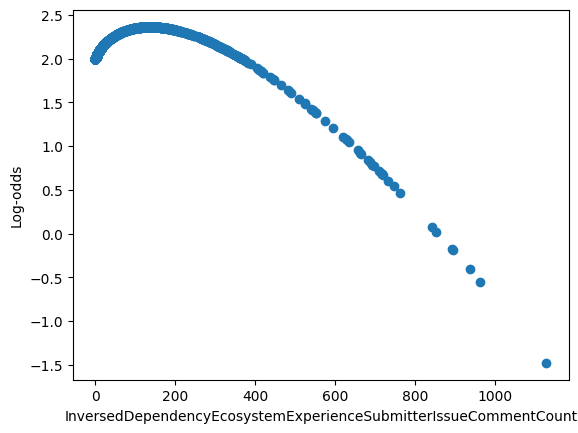

In [9]:
import json
from numbers import Number
from typing import Callable, Tuple
import numpy as np
import statsmodels.api as sm


def create_model(
    continuous_copy: pd.DataFrame,
    field: str,
    var_transform: Callable
) -> Tuple[sm.GLM, pd.DataFrame, str]:

    # Drops zeroes.
    rows_with_zeroes = continuous_copy.loc[continuous_copy[field] == 0].index
    independents_wo_zeroes = continuous_copy.drop(rows_with_zeroes)
    test_dependent = df[pr_merged_key].drop(rows_with_zeroes)

    # Selects and transforms fields.
    test_independents = pd.DataFrame()
    test_independents[field] = independents_wo_zeroes[field]\
        .apply(var_transform)
    ln_field = f'ln(.) x {field}'
    test_independents[ln_field] = test_independents[field]\
        .apply(lambda x: np.log(x) * x)

    # Adds constant
    test_independents = sm.add_constant(test_independents)

    # Does the test.
    logit_results = sm.GLM(test_dependent,
                           test_independents,
                           family=sm.families.Binomial()).fit()

    return logit_results, test_independents, ln_field


def box_tidwill(
    logit_results: sm.GLM,
    field: str,
    ln_field: str,
    independents_wo_zeroes: pd.DataFrame,
    continuous_copy: pd.DataFrame,
    only_print_significant: bool
) -> bool:

    p_value = logit_results.pvalues[ln_field]

    is_significant = p_value < 0.05
    is_significant_tag = "significant" if is_significant else "insignificant"

    if not only_print_significant or is_significant:
        print(f'({is_significant_tag}) {field}: p={p_value} (used {len(independents_wo_zeroes)}/{len(continuous_copy)} entries).')

    return is_significant


def visualize(
    logit_results: sm.GLM,
    test_independents: pd.DataFrame,
    field: str,
    bt_significant: bool,
    subpath: str = "",
):

    predicted = logit_results.predict(test_independents)
    log_odds = np.log(predicted / (1 - predicted))

    plt.clf()
    plt.scatter(x=test_independents[field], y=log_odds)
    plt.xlabel(field)
    plt.ylabel("Log-odds")

    sf = "bt_failed" if bt_significant else "bt_success"
    output_path = f'{figure_base_path}/log-odds-independence/{subpath}/{sf}/{field}.png'
    safe_save_fig(output_path)


def test_log_linearity(
    __independents: pd.DataFrame,
    var_transform: Callable[[Number], Number],
    only_print_significant: bool = False,
    create_figures: bool = True,
    figure_sub_path: str = "",
    remove_top_X: float = 0.0,
):
    continuous_vars = __independents.select_dtypes(include='number')
    continuous_copy = continuous_vars.copy()

    bt_all_failed = []

    for field in continuous_copy.columns:
        # Removes top X% entries.
        threshold = continuous_copy[field].quantile(1 - remove_top_X/100)
        mask = continuous_copy[field] < threshold
        masked_continuous_copy = continuous_copy[mask]
        masked_dependent = df[[pr_merged_key]].copy()[mask]

        # Drops zeroes.
        rows_with_zeroes = masked_continuous_copy.loc[masked_continuous_copy[field] == 0].index
        independents_wo_zeroes = masked_continuous_copy.drop(rows_with_zeroes)
        test_dependent = masked_dependent.drop(rows_with_zeroes)

        # Selects and transforms fields.
        test_independents = pd.DataFrame()
        test_independents[field] = independents_wo_zeroes[field]\
            .apply(var_transform)
        ln_field = f'ln(.) x {field}'
        test_independents[ln_field] = test_independents[field]\
            .apply(lambda x: np.log(x) * x)

        # Adds constant
        test_independents = sm.add_constant(test_independents)

        # Does the test.
        logit_results = sm.GLM(test_dependent,
                               test_independents,
                               family=sm.families.Binomial()).fit()

        bt_significant = box_tidwill(logit_results, field, ln_field,
                                     independents_wo_zeroes,
                                     continuous_copy,
                                     only_print_significant)

        if (bt_significant):
            bt_all_failed.append(field)

        if create_figures:
            visualize(logit_results, test_independents,
                      field, bt_significant, figure_sub_path)

    return bt_all_failed


failed_tests = test_log_linearity(df[independent_fields], lambda x: x)


print()
print(f'{len(failed_tests)=}')
print(f'{failed_tests=}')


In [12]:
from scipy.stats import yeojohnson


df_failed = df[failed_tests].copy()
print(f'{len(df_failed)=}')

transformations = [
    math.sqrt,
    math.cbrt,
    lambda x: math.log(1 + x),
    lambda x: math.log10(1 + x),
    lambda x: 1 / x,
    lambda x: x**2,
    lambda x: x**3,
]

# log10 is removed as it's the same as ln
# recip is removed as it's useless
# 
trasnformation_names = [
    "sqrt",
    "cbrt",
    "ln",
    "log10",
    "recip",
    'squared',
    'cubed'
]

df_failed = df[["InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate"]]
for transformation, transformation_name in zip(transformations, trasnformation_names):
    print(transformation)
    try:
        test_log_linearity(df_failed, transformation,
                           figure_sub_path=f"{transformation_name}_transformed")
    except:
        ...
    print()

print("Yeo-Johnson")
for field in failed_tests:
    df_failed[field], _lambda = yeojohnson(df_failed[[field]])
    print(f'{field}: {_lambda=}')
print()
test_log_linearity(df_failed, lambda x: x, figure_sub_path="transformed")

# IntraProjectSubmitterPullRequestSuccessRate                                       (cbrt)
# FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRIntegratorToSubmitter-In)    (ln, log10, squared)
# EcosystemExperienceSubmitterPullRequestSuccessRate                                (ln, log10)
# IntraProjectSubmitterPullRequestCommentCount                                      (recip)
# IntraProjectSubmitterPullRequestSubmissionCount                                   (squared)
# EcosystemExperienceSubmitterIssueCommentCount                                     (cubed)
# EcosystemExperienceSubmitterIssueSubmissionCount                                  (yj)


len(df_failed)=181597
<built-in function sqrt>

<built-in function cbrt>

<function <lambda> at 0x7fa0364ef920>

<function <lambda> at 0x7fa0364efba0>

<function <lambda> at 0x7fa0364ef240>

<function <lambda> at 0x7fa0364edd00>

<function <lambda> at 0x7fa0364efec0>

Yeo-Johnson


KeyError: "None of [Index(['ControlPullRequestLifeTimeInMinutes'], dtype='object')] are in the [index]"

(insignificant) InversedDependencyEcosystemExperienceSubmitterPullRequestCommentCount: p=0.8492847170519627 (used 7837/181597 entries).


[]

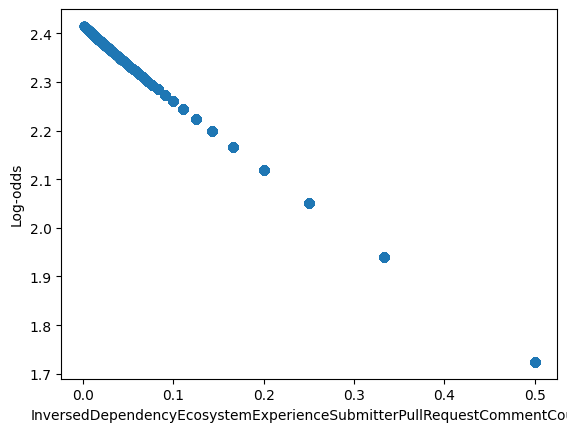

In [20]:
test_log_linearity(df[["InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate"]],
                   #    lambda x: np.cbrt(1 + x),
                   lambda x: 1 / (x + 1),
                   figure_sub_path='cbrt_transformed')


### Multicolinearity

In [21]:
multicollinear_fields = [
    # ### Cluster: if it has comments, it will commonly have a comment from an external user as well?
    # 'ControlPullRequestHasCommentByExternalUser',
    "ControlPullRequestHasComments",

    # ### Cluster: PR submitters receive comments.
    # "ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.PRIntegratorToSubmitter-In))",
    "ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.PRCommenterToSubmitter-In))",

    # Almost all of the shared experience fields correlate directly with each other.
    # 3/7 correlate with everything, 2 with everything - 1, and 2 with fewer than that.
    # They discussed stuff in issues correlates with: pull requests submitted
    # and commenting/disc. participation (in either direction) on PRs and issues;
    # i.e., if people cooperate, they cooperate across the board.


    # ### Cluster: Shared experience; i.e., people work together.
    # "ln(1 + SharedExperiencePullRequestSubmittedBySubmitterIntegratedByIntegrator)", 
    "ln(1 + SharedExperiencePullRequestSubmittedBySubmitterCommentedOnByIntegrator)",
    # "ln(1 + SharedExperiencePullRequestSubmittedByIntegratorIntegratedBySubmitter)",
    "ln(1 + SharedExperiencePullRequestSubmittedByIntegratorCommentedOnBySubmitter)",
    "ln(1 + SharedExperiencePullRequestDiscussionParticipationByIntegratorAndSubmitter)",
    "ln(1 + SharedExperienceIssueSubmittedByIntegratorCommentedOnBySubmitter)",
    "ln(1 + SharedExperienceIssueSubmittedBySubmitterCommentedOnByIntegrator)",
    "ln(1 + SharedExperienceIssueDiscussionParticipationByIntegratorAndSubmitter)",



    # ### Cluster: Issue comments
    # Com-com in and out correlation makes sense as it's a many-to-many relationship, so there's always a
    # reciprocating edge. It also makes sense that this correlates with commenter to submitter as when they
    # participate in a discussion, they automatically add an edge to the submitter.
    # "ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.IssueCommenterToSubmitter-Out))", corr. with 2
    # corr. with 2
    "ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.IssueCommenterToCommenter-In))",
    # corr. with 2
    "ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.IssueCommenterToCommenter-Out))",


    # ### Cluster: Inversed dependencies - pulls and issues.
    # All of their coeficients are positive, so more pulls = more acceptance =
    # more issues = more comments in the ecosystem.
    # All of them correlate with the others, so we can keep only 1.
    # "ln(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)", # corr with 4
    "InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate", 
    "ln(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestCommentCount)",
    "ln(1 + InversedDependencyEcosystemExperienceSubmitterIssueSubmissionCount)",
    "ln(1 + InversedDependencyEcosystemExperienceSubmitterIssueCommentCount)",

    # ### Cluster: PR commenters.
    # Same logic applies here as with the issues, in and out are bound to be the same, and
    # commenting on a PR by definition means an outgoing edge to the submitter.
    # Its a fully connected cluster, so we can only keep one.
    # "ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToCommenter.PRCommenterToSubmitter-Out))",
    "ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToCommenter.PRCommenterToCommenter-In))",
    "ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToCommenter.PRCommenterToCommenter-Out))",

    # ### Cluster: Same logic as the other commenter clusters.
    # "ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToSubmitter.PRCommenterToSubmitter-Out))",
    "ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToSubmitter.PRCommenterToCommenter-In))",
    "ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToSubmitter.PRCommenterToCommenter-Out))",

    # ### Cluster: Whenever there's an issue posted, the submitter responds themselves, and if there
    # are multiple participating parties, they'll always get an edge of both.
    # "ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToCommenter.IssueCommenterToSubmitter-In))"
    "ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToCommenter.IssueCommenterToCommenter-In))",

    # ### Cluster: Integrators comment on their integrated PRs.
    "ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToCommenter.PRIntegratorToSubmitter-Out))",
    # "ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToCommenter.PRCommenterToSubmitter-Out))",

    # ### Cluster: integrators comment on PRs.
    # "ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToSubmitter.PRIntegratorToSubmitter-Out))",
    "ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToSubmitter.PRCommenterToSubmitter-Out))",

    # ### Cluster: integrators comment on PRs.
    # "ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToCommenter.PRIntegratorToSubmitter-In))",
    "ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToCommenter.PRCommenterToSubmitter-In))",

    # ### Cluster: Classic commenter correlation.
    # "ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToSubmitter.IssueCommenterToSubmitter-Out))",
    "ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToSubmitter.IssueCommenterToCommenter-In))",
    "ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToSubmitter.IssueCommenterToCommenter-Out))",

    # ### Cluster: Integrator comments on prs they integrate.
    "ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToSubmitter.PRIntegratorToSubmitter-In))",
    # "ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToSubmitter.PRCommenterToSubmitter-In))",

    # ### Cluster: Integrator comments to submitters.
    # This is not a trivial fully connected cluster. These three nodes
    # form a bridge between two clusters.
    # "ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToCommenter.PRIntegratorToSubmitter-Out))",
    "ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.PRIntegratorToSubmitter-Out))",
    "ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToCommenter.PRCommenterToSubmitter-Out))",

    # ### Cluster: commenting on your own PRs triggers a response.
    # "ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToCommenter.PRIntegratorToSubmitter-In))",
    "ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToCommenter.PRCommenterToSubmitter-In))",
    "ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToCommenter.PRCommenterToCommenter-Out))",
    "ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToCommenter.PRCommenterToCommenter-In))",

    # ### Cluster: Participating in comments cluster.
    # "ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.PRCommenterToSubmitter-Out))",
    "ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.PRCommenterToCommenter-In))",
    "ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.PRCommenterToCommenter-Out))",

    # ### Cluster: commenter cluster.
    # "ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToCommenter.IssueCommenterToSubmitter-Out))",
    "ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToCommenter.IssueCommenterToCommenter-In))",
    "ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToCommenter.IssueCommenterToCommenter-Out))",

    # ### Cluster: Not a cluster; it's a line.
    # This suggest there's some overlap in participating in your own discussions and receiving responses.
    # "ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.IssueCommenterToSubmitter-In))",
    "ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToCommenter.IssueCommenterToSubmitter-In))",
    "ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToCommenter.IssueCommenterToCommenter-Out))",
    # "ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToCommenter.IssueCommenterToSubmitter-Out))",

    # ### Cluster: Not a cluster, but these two form a bridge between two clusters.
    # This relation makes complete sense as if you submit PRs in the dependency ecosystem,
    # you submit them in the general ecosystem too. There's no reason to pick either, however,
    # Ecosystem exp has more data to it.
    "ln(1 + EcosystemExperienceSubmitterPullRequestSubmissionCount)",
    "ln(1 + DependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)",

    # ### CLuster: In the ecosystem, commenting on issues and PRs correlates with
    # Issue submission counts and PR success rate.
    # "ln(1 + EcosystemExperienceSubmitterIssueSubmissionCount)",
    "ln(1 + EcosystemExperienceSubmitterPullRequestCommentCount)",
    "ln(1 + EcosystemExperienceSubmitterIssueCommentCount)",
    # "EcosystemExperienceSubmitterPullRequestSuccessRate",

    # ### Cluster: Dependency ecosystem experience.
    # All of these are positively correlated; i.e., if you do more you do more and better.
    "DependencyEcosystemExperienceSubmitterPullRequestSuccessRate", # corr. with 3 (PR sub, PR com, Issue comm)
    "ln(1 + DependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)", # corr. with 4
    "ln(1 + DependencyEcosystemExperienceSubmitterPullRequestCommentCount)", # corr. with 4
    # "ln(1 + DependencyEcosystemExperienceSubmitterIssueSubmissionCount)", # corr. with 3
    "ln(1 + DependencyEcosystemExperienceSubmitterIssueCommentCount)", # corr with 4

    # ### Cluster Pr Success rate correlates with FTC (which I didn't want to include like this anyways),
    # and the more PR submissions you do and more PR comments you give, the worse you perform.
    # "IntraProjectSubmitterPullRequestSuccessRate",
    "SubmitterIsFirstTimeContributor",
    "ln(1 + IntraProjectSubmitterPullRequestSubmissionCount)",
    "ln(1 + IntraProjectSubmitterPullRequestCommentCount)",
    # "ln(1 + ControlIntraProjectPullRequestExperienceOfIntegrator)",
    "ln(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)",
    "ln(1 + IntraProjectSubmitterIssueSubmissionCount)",


    # ### Cluster: PR submitters get comments from their integrators.
    #  
    # "ln(1 + FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRIntegratorToSubmitter-In))",
    "ln(1 + FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRCommenterToSubmitter-In))",

    "ln(1 + FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRCommenterToCommenter-In))",
    # "ln(1 + FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRIntegratorToSubmitter-Out))",
    "ln(1 + FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRCommenterToCommenter-Out))",
    
    # People who comment on PRs comment on issues.
    "ln(1 + FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRCommenterToSubmitter-Out))",
    # "ln(1 + FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.IssueCommenterToSubmitter-Out))",
    "ln(1 + FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.IssueCommenterToCommenter-In))",
    "ln(1 + FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.IssueCommenterToCommenter-Out))",
]

print(f'{len(multicollinear_fields)=}')


len(multicollinear_fields)=55


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def change_bin_fields_to_float(__df: pd.DataFrame):
    repl_df = __df.copy()
    value_mapper = {False: 0, True: 1}
    
    binary_fields = __df.select_dtypes(exclude='number')
    for feature in binary_fields:
        repl_df[feature] = __df[feature].replace(value_mapper)

    return repl_df

tested_predictors = df[independent_fields].drop(multicollinear_fields, axis=1)
tested_predictors = change_bin_fields_to_float(tested_predictors)

vif_df = pd.DataFrame()
vif_df['variable'] = tested_predictors.columns
vif_df['VIF'] = [variance_inflation_factor(tested_predictors.values, i)
                 for i in range(tested_predictors.shape[1])]

print(vif_df)

KeyError: "['ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.PRCommenterToSubmitter-In))', 'ln(1 + SharedExperiencePullRequestSubmittedBySubmitterCommentedOnByIntegrator)', 'ln(1 + SharedExperiencePullRequestSubmittedByIntegratorCommentedOnBySubmitter)', 'ln(1 + SharedExperiencePullRequestDiscussionParticipationByIntegratorAndSubmitter)', 'ln(1 + SharedExperienceIssueSubmittedByIntegratorCommentedOnBySubmitter)', 'ln(1 + SharedExperienceIssueSubmittedBySubmitterCommentedOnByIntegrator)', 'ln(1 + SharedExperienceIssueDiscussionParticipationByIntegratorAndSubmitter)', 'ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.IssueCommenterToCommenter-In))', 'ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.IssueCommenterToCommenter-Out))', 'ln(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestCommentCount)', 'ln(1 + InversedDependencyEcosystemExperienceSubmitterIssueSubmissionCount)', 'ln(1 + InversedDependencyEcosystemExperienceSubmitterIssueCommentCount)', 'ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToCommenter.PRCommenterToCommenter-In))', 'ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToCommenter.PRCommenterToCommenter-Out))', 'ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToSubmitter.PRCommenterToCommenter-In))', 'ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToSubmitter.PRCommenterToCommenter-Out))', 'ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToCommenter.IssueCommenterToCommenter-In))', 'ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToCommenter.PRIntegratorToSubmitter-Out))', 'ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToSubmitter.PRCommenterToSubmitter-Out))', 'ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToCommenter.PRCommenterToSubmitter-In))', 'ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToSubmitter.IssueCommenterToCommenter-In))', 'ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToSubmitter.IssueCommenterToCommenter-Out))', 'ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToSubmitter.PRIntegratorToSubmitter-In))', 'ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.PRIntegratorToSubmitter-Out))', 'ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToCommenter.PRCommenterToSubmitter-Out))', 'ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToCommenter.PRCommenterToSubmitter-In))', 'ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToCommenter.PRCommenterToCommenter-Out))', 'ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToCommenter.PRCommenterToCommenter-In))', 'ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.PRCommenterToCommenter-In))', 'ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.PRCommenterToCommenter-Out))', 'ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToCommenter.IssueCommenterToCommenter-In))', 'ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToCommenter.IssueCommenterToCommenter-Out))', 'ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToCommenter.IssueCommenterToSubmitter-In))', 'ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToCommenter.IssueCommenterToCommenter-Out))', 'ln(1 + EcosystemExperienceSubmitterPullRequestSubmissionCount)', 'ln(1 + DependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)', 'ln(1 + EcosystemExperienceSubmitterPullRequestCommentCount)', 'ln(1 + EcosystemExperienceSubmitterIssueCommentCount)', 'ln(1 + DependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)', 'ln(1 + DependencyEcosystemExperienceSubmitterPullRequestCommentCount)', 'ln(1 + DependencyEcosystemExperienceSubmitterIssueCommentCount)', 'ln(1 + IntraProjectSubmitterPullRequestSubmissionCount)', 'ln(1 + IntraProjectSubmitterPullRequestCommentCount)', 'ln(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)', 'ln(1 + IntraProjectSubmitterIssueSubmissionCount)', 'ln(1 + FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRCommenterToSubmitter-In))', 'ln(1 + FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRCommenterToCommenter-In))', 'ln(1 + FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRCommenterToCommenter-Out))', 'ln(1 + FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRCommenterToSubmitter-Out))', 'ln(1 + FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.IssueCommenterToCommenter-In))', 'ln(1 + FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.IssueCommenterToCommenter-Out))'] not found in axis"

In [ ]:
problematic_vif = vif_df[vif_df['VIF'] >= 5]
print("Problematic VIF scores:")
print(problematic_vif)

Problematic VIF scores:
Empty DataFrame
Columns: [variable, VIF]
Index: []


coof_threshold=0.5
Correlating pairs:
[]

Variable correlation frequency:
[]

Transitive closure of correlating pairs:
[
    []
]


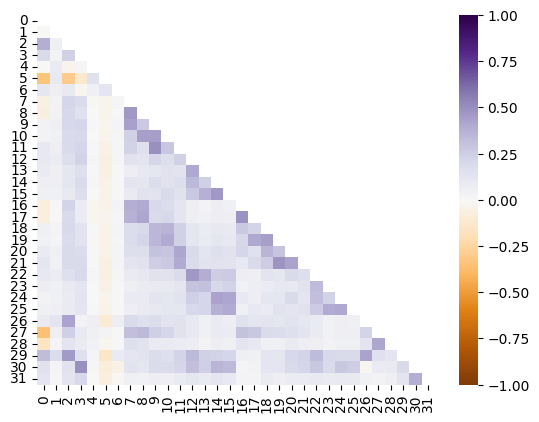

In [ ]:
import seaborn as sb
import json
from python_proj.utils.util import SafeDict

tick_labels = list(range(len(vif_df)))
corr = tested_predictors.corr()

rows, cols = corr.shape
mask = np.invert(np.tril(np.ones((rows, cols), dtype=bool), k=-1))
dataplot = sb.heatmap(corr, cmap="PuOr",
                      xticklabels=tick_labels, yticklabels=tick_labels,
                      mask=mask,
                      vmin=-1, vmax=1)


def get_correlating_fields(coof_threshold, corr):
    print(f'{coof_threshold=}')
    correlating_fields = []
    # print(corr)
    for rowIndex, row in corr.iterrows():  # iterate over rows
        for columnIndex, coof in row.items():
            if columnIndex <= rowIndex:
                continue
            if abs(coof) < coof_threshold:
                continue
            correlating_fields.append([columnIndex, rowIndex, coof])
    correlating_fields = [list(entry) for entry in correlating_fields]
    print("Correlating pairs:\n" + json.dumps(correlating_fields, indent=4) + "\n")
    return correlating_fields


correlating_fields = get_correlating_fields(coof_threshold=0.5, corr=corr)

# Identify problematic fields:
presence_counts = SafeDict(default_value=0)
for (field_a, field_b, _) in correlating_fields:
    presence_counts[field_a] += 1
    presence_counts[field_b] += 1
pc = list(presence_counts.items())
pc.sort(key=lambda x: x[1])
print(f'Variable correlation frequency:\n{json.dumps(pc, indent=4)}\n')

# Generate transitive closures


def unify_if_overlapping(collections: list[list]):
    # gather the lists that do overlap
    overlapping = [x for x in collections if
                   any(x_element in [y for k in collections
                                     if k != x for y in k]
                       for x_element in x)]
    # flatten and get unique
    overlapping = sorted(list(set([z for x in overlapping for z in x])))
    # get the rest
    non_overlapping = [x for x in collections if all(
        y not in overlapping for y in x)]
    # use the line bellow only if merged non-overlapping elements are desired
    # non_overlapping = sorted([y for x in non_overlapping for y in x])
    non_overlapping.append(overlapping)
    return non_overlapping


correlating_no_coof = [(a, b) for (a, b, _) in correlating_fields]
unified = unify_if_overlapping(correlating_no_coof)
print("Transitive closure of correlating pairs:\n" +
      json.dumps(unified, indent=4))


Plots a graph when there are correlating fields.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

if len(correlating_fields) > 0:
    fields = list(tested_predictors.columns)
    enumerated_list = list(enumerate(fields))
    ids = []
    edge_colors = []
    for source, target, coof in correlating_fields:
        source_idx = fields.index(source)
        target_idx = fields.index(target)
        ids.append((source_idx, target_idx))
        edge_colors.append('red' if coof < 0 else 'green')

    # Create an empty graph
    graph = nx.Graph()    


    # Add edges to the graph from the list of tuples
    graph.add_edges_from(ids)

    pos = nx.spring_layout(graph, k=0.4)
    nx.draw(graph, pos, with_labels=True, edge_color=edge_colors)
    plt.show()

    print(json.dumps(enumerated_list))


In [ ]:
print(f'{len(tested_predictors.columns)=}')
print(f'{tested_predictors.columns=}')

len(tested_predictors.columns)=32
tested_predictors.columns=Index(['ControlIntegratedBySameUser', 'ControlHasHashTagInDescription',
       'IntraProjectSubmitterPullRequestSuccessRate',
       'EcosystemExperienceSubmitterPullRequestSuccessRate',
       'ControlPullRequestHasCommentByExternalUser',
       'ln(1 + ControlPullRequestLifeTimeInMinutes)',
       'ln(1 + ControlNumberOfCommitsInPullRequest)',
       'ln(1 + FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRIntegratorToSubmitter-In))',
       'ln(1 + FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.IssueCommenterToSubmitter-In))',
       'ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.PRIntegratorToSubmitter-In))',
       'ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.IssueCommenterToSubmitter-In))',
       'ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToCommenter.PRIntegratorToSubmitter-In))',
       'ln(1 + FirstOrderDegreeCentralityV2(IssueCommenterToCommenter.PRIntegratorToSubmitter-In

### More Log-odds independence

(significant) IntraProjectSubmitterPullRequestSuccessRate: p=4.025353864348834e-18 (used 67249/122461 entries).
(significant) EcosystemExperienceSubmitterPullRequestSuccessRate: p=8.902808332356787e-05 (used 56842/122461 entries).
(significant) ln(1 + ControlPullRequestLifeTimeInMinutes): p=0.0 (used 122461/122461 entries).
(significant) ln(1 + ControlNumberOfCommitsInPullRequest): p=6.4999788845810685e-77 (used 122228/122461 entries).
(significant) ln(1 + FirstOrderDegreeCentralityV2(PRIntegratorToSubmitter.PRIntegratorToSubmitter-In)): p=0.00026383863046740925 (used 37216/122461 entries).
(significant) ln(1 + FirstOrderDegreeCentralityV2(PRCommenterToSubmitter.IssueCommenterToSubmitter-In)): p=0.023885086773528394 (used 34826/122461 entries).
(significant) ln(1 + ControlIntraProjectPullRequestExperienceOfIntegrator): p=6.424660350059074e-08 (used 109869/122461 entries).
(significant) ln(1 + SharedExperiencePullRequestSubmittedBySubmitterIntegratedByIntegrator): p=1.1346497382423424e-

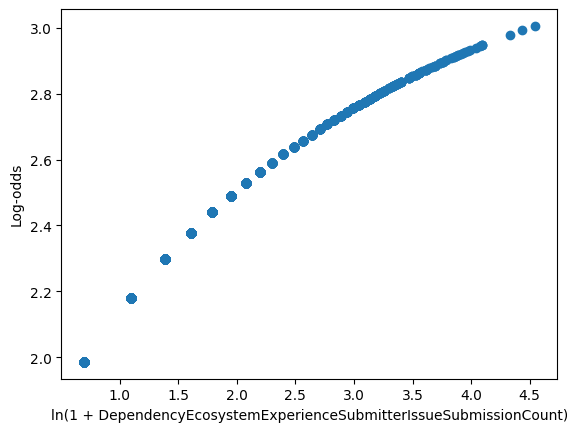

In [ ]:

failed_bt_tests = test_log_linearity(tested_predictors, lambda x: x, True, figure_sub_path="no_multicollinear")
print()
print(f'{len(failed_tests)=} / {len(tested_predictors.columns)}')